In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [45]:
from sklearn.datasets import load_iris

In [103]:
plt.rcParams['figure.figsize'] = [10, 7]
plt.style.use('fivethirtyeight')

In [104]:
ds=load_iris() #loading the data from the iris dataset to ds, only the independent variables
data = pd.DataFrame(ds['data'], columns = ds['feature_names']) #converting the imported data into a dataframe

In [105]:
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [106]:
data.shape

(150, 4)

In [107]:
#there are 150 rows, 4 columns in the dataset

In [108]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [109]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 4 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
dtypes: float64(4)
memory usage: 4.8 KB


In [110]:
#there are no null values in the dataset

In [111]:
x=data.iloc[:,:].values

## Finding optimal number of K_value

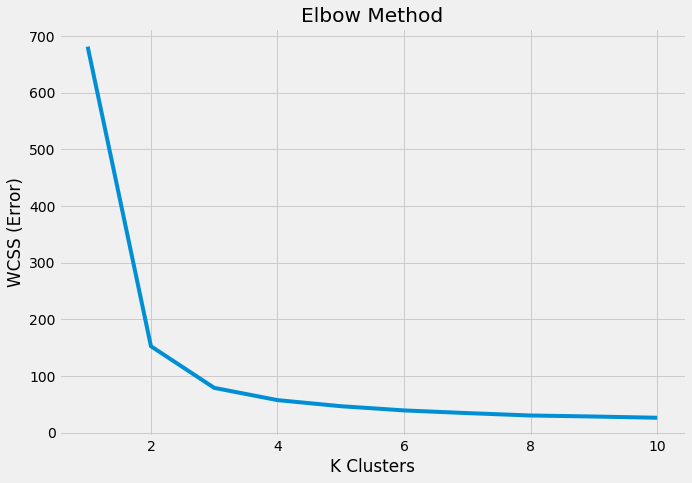

In [112]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
    
    kmeans = KMeans(n_clusters = i, random_state = 0, init = 'k-means++')
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1,11), wcss)
plt.title('Elbow Method')
plt.xlabel('K Clusters')
plt.ylabel('WCSS (Error)')
plt.show()

### considering optimal number of clusters as 3

In [113]:
# Generating Model

kmeans = KMeans(n_clusters = 3, random_state = 0, init = 'k-means++')
y_kmeans = kmeans.fit_predict(x)

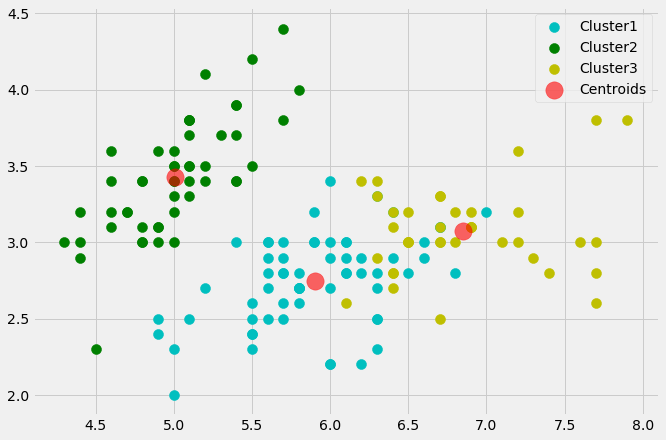

In [114]:
# Visualization

plt.scatter(x[y_kmeans==0,0], x[y_kmeans==0,1],s=100, c = 'c', label = 'Cluster1')
plt.scatter(x[y_kmeans==1,0], x[y_kmeans==1,1],s=100, c = 'g', label = 'Cluster2')
plt.scatter(x[y_kmeans==2,0], x[y_kmeans==2,1],s=100, c = 'y', label = 'Cluster3')

plt.scatter(kmeans.cluster_centers_[:, 0],kmeans.cluster_centers_[:, 1], s = 300, 
            c = 'r', alpha=0.6,label = 'Centroids')
plt.legend()
plt.show()

## Hirarchical clustering

In [115]:
import scipy.cluster.hierarchy as sch

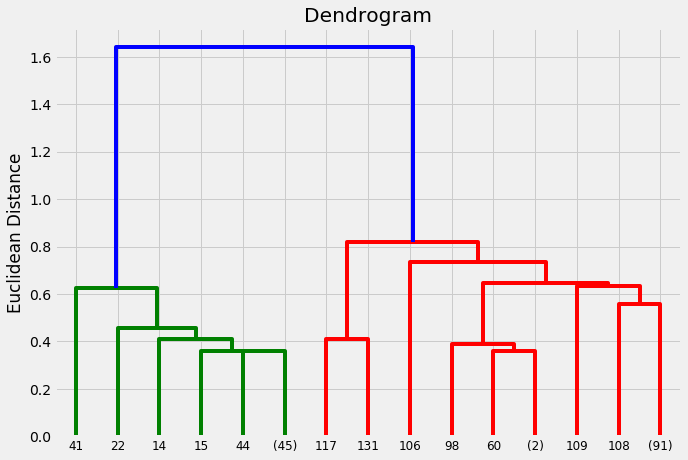

In [116]:
dendrogram = sch.dendrogram(sch.linkage(x,method = 'single'),p=5,truncate_mode='level')
plt.title('Dendrogram')
plt.ylabel('Euclidean Distance')
plt.show()

In [117]:
# considering the clusters as 3 optimal number of clusters

In [118]:
k=3

# Complete linkage method

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 2 0 2 0 2 0 2 2 2 2 0 2 0 2 2 0 2 0 2 0 0
 0 0 0 0 0 2 2 2 2 0 2 0 0 0 2 2 2 0 2 2 2 2 2 0 2 2 0 0 0 0 0 0 2 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True False  True False  True False  True False
 False False False  True False  True False False  True False  True False
  True  True  True  True  True  True  True False False False False  True
 False  True  True  True False False False  True False False False False
 False  True False False  True  True  True  True  True  True False  True
  True  True  True  True  True  True 

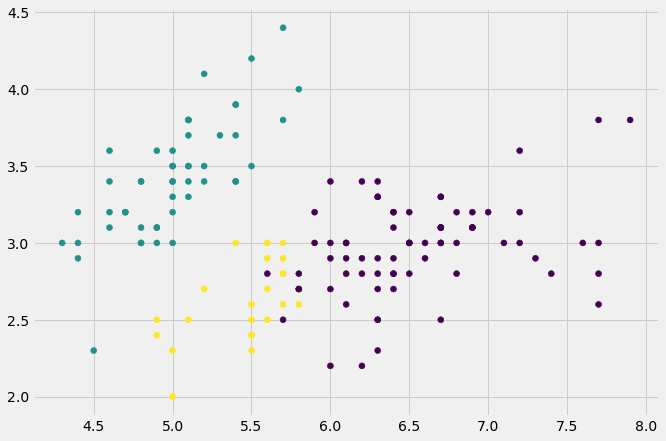

In [119]:
# Generating Model

from sklearn.cluster import AgglomerativeClustering
agglo = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'complete')
y_agglo = agglo.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c = y_agglo)
# plt.show()
print(y_agglo)
print(y_agglo ==0)

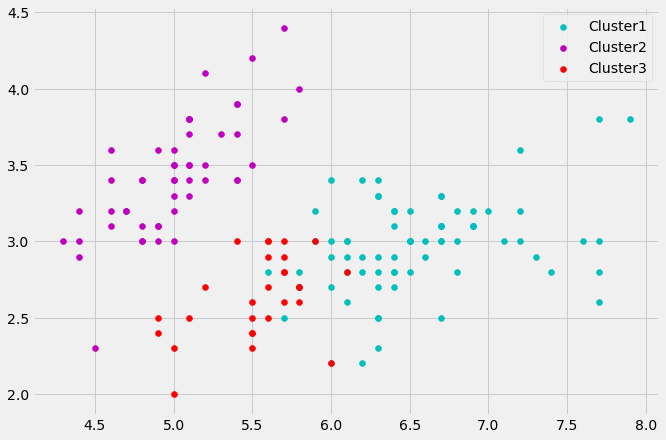

In [120]:
plt.scatter(x[y_agglo==0,0], x[y_agglo==0,1], c = 'c', label = 'Cluster1')
plt.scatter(x[y_agglo==1,0], x[y_agglo==1,1], c = 'm', label = 'Cluster2')
plt.scatter(x[y_agglo==2,0], x[y_agglo==2,1], c = 'r', label = 'Cluster3')

plt.legend()
plt.show()

##### using  complete linkage clustering is good. proportion of the data points in each cluster is different. Separation of the clusters is not that great . but, good separation is observed at 2nd and 3rd clusters

# ward method

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 0 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True False  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True False False False False  True False
 False False False False False  True 

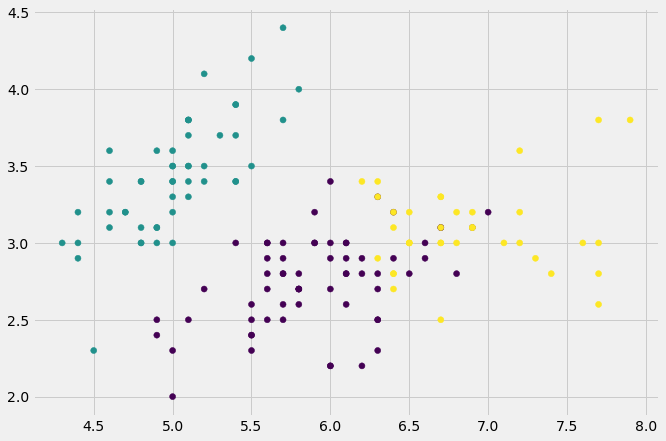

In [121]:
agglo = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_agglo = agglo.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c = y_agglo)
# plt.show()
print(y_agglo)
print(y_agglo ==0)

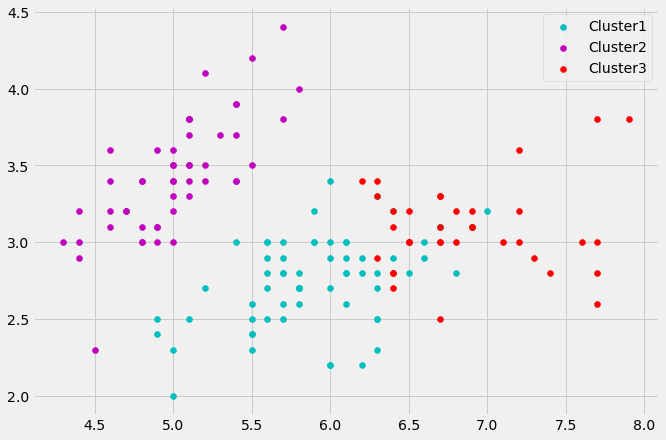

In [122]:
plt.scatter(x[y_agglo==0,0], x[y_agglo==0,1], c = 'c', label = 'Cluster1')
plt.scatter(x[y_agglo==1,0], x[y_agglo==1,1], c = 'm', label = 'Cluster2')
plt.scatter(x[y_agglo==2,0], x[y_agglo==2,1], c = 'r', label = 'Cluster3')

plt.legend()
plt.show()

##### using Ward method cluster separation is very good.but, distance between the clusters is not great,but the data points propertion in each cluster is really good.

# Single Linkage method

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True 

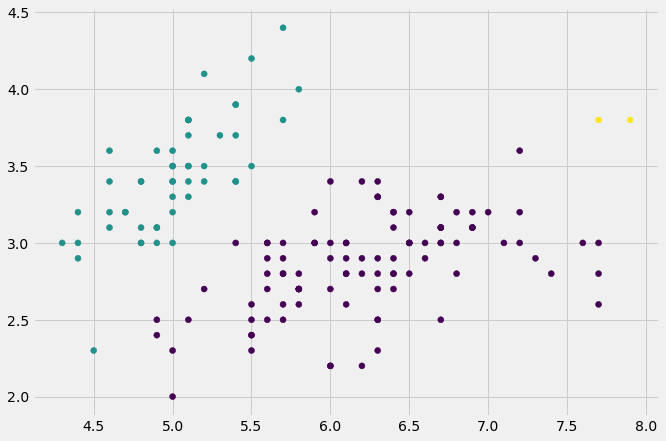

In [123]:
agglo = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'single')
y_agglo = agglo.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c = y_agglo)
# plt.show()
print(y_agglo)
print(y_agglo ==0)

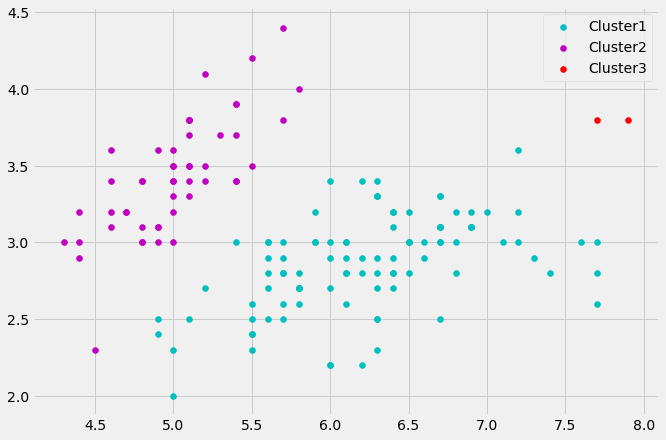

In [124]:
plt.scatter(x[y_agglo==0,0], x[y_agglo==0,1], c = 'c', label = 'Cluster1')
plt.scatter(x[y_agglo==1,0], x[y_agglo==1,1], c = 'm', label = 'Cluster2')
plt.scatter(x[y_agglo==2,0], x[y_agglo==2,1], c = 'r', label = 'Cluster3')

plt.legend()
plt.show()

##### clustering is improper using single linkage method, 97% of the data points are detected to be one cluster, remaining are negligible clusters.

# Average linkage method

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 2 2 2 0 2 2 2 2
 2 2 0 0 2 2 2 2 0 2 0 2 0 2 2 0 0 2 2 2 2 2 0 2 2 2 2 0 2 2 2 0 2 2 2 0 2
 2 0]
[False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True  True  True  True  True  True  True  True  True
  True  True  True  True False  True False False False False  True False
 False False False False False  True 

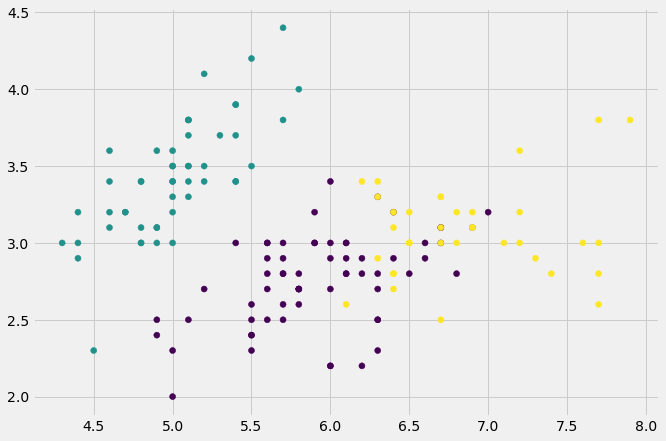

In [125]:
agglo = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'average')
y_agglo = agglo.fit_predict(x)
plt.scatter(x[:,0], x[:,1], c = y_agglo)
# plt.show()
print(y_agglo)
print(y_agglo ==0)

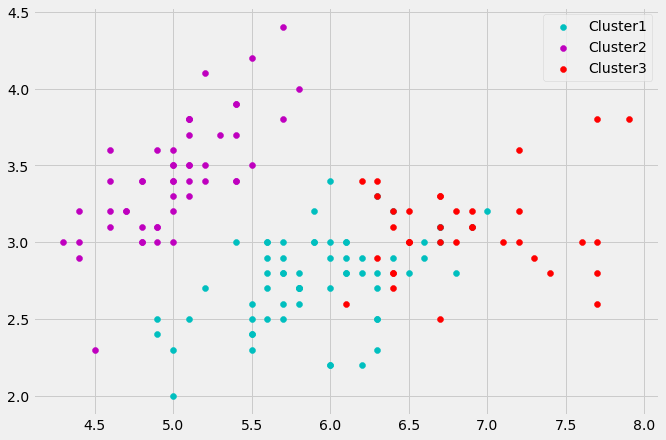

In [126]:
plt.scatter(x[y_agglo==0,0], x[y_agglo==0,1], c = 'c', label = 'Cluster1')
plt.scatter(x[y_agglo==1,0], x[y_agglo==1,1], c = 'm', label = 'Cluster2')
plt.scatter(x[y_agglo==2,0], x[y_agglo==2,1], c = 'r', label = 'Cluster3')

plt.legend()
plt.show()

##### using Average linkage clustering is good, clusters are separated properly. But,distance is not observed among the clusters.